# Graphs depicting the blacklisting frequency of a liar infiltrating multiple clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#configs
distance = 100000
nbClusters = 4
nbNodesRange = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
withSuspects = True


filename = "cluster_infiltration_N_" + str(nbNodesRange[0]) + "_to_" +\
    str(nbNodesRange[len(nbNodesRange)-1]) + "_with_" + str(nbClusters) + "_clusters"

if withSuspects:
    filename += "_with_suspects"


In [3]:
data= pd.read_csv("data/" + filename + ".csv").drop_duplicates()

In [4]:
data[data["liar_caught"] == False][data["N"] == 12]

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,N,c1,c2,c3,c4,liar_caught
28800,12,3,2,3,4,False
28802,12,3,4,3,2,False
28898,12,4,4,2,2,False
28899,12,4,2,2,4,False
28929,12,3,3,4,2,False
28930,12,3,4,2,3,False
30075,12,5,2,2,3,False
33347,12,5,2,3,2,False
39017,12,4,2,4,2,False
46992,12,1,2,1,8,False


In [5]:
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()

liar_caught,N,False,True
0,11,10,50
1,12,19,74
2,13,28,80
3,14,25,117
4,15,24,140
5,16,48,163
6,17,42,198
7,18,52,240
8,19,79,249
9,20,82,311


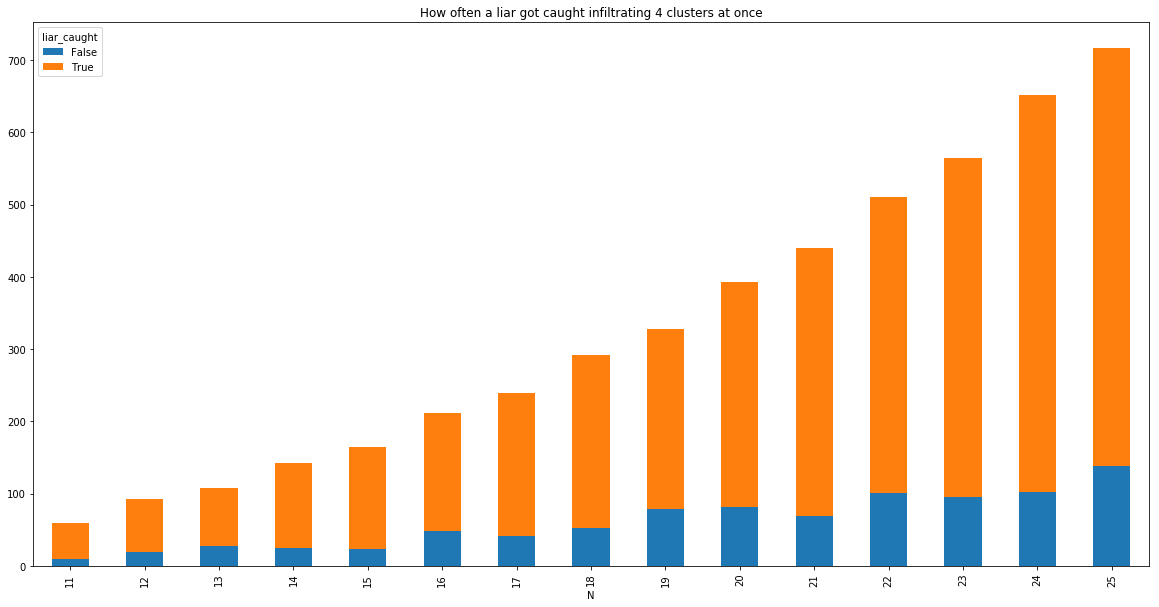

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
data[["N", "liar_caught"]][data["N"] <26].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
    .plot.bar(stacked=True, ax=ax, x="N", title="How often a liar got caught infiltrating "+\
              str(nbClusters)+" clusters at once")

In [7]:
fig.savefig('graphs/blacklisting_percentages/'+filename+'.png')

In [8]:
if nbClusters == 2:
    data["imbalance"] = (data["c1"]/data["c2"]).round(3)
    fig1, ax1 = plt.subplots(figsize=(50, 15))
    data[["imbalance", "liar_caught"]].drop_duplicates()\
        .groupby(["imbalance", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
        .plot.bar(stacked=True, ax=ax1, x="imbalance", rot=90,
                  title="Node imbalance between "+str(nbClusters)+" clusters")
    fig1.savefig('graphs/cluster_ratios/'+filename+'_cluster_ratio.png')